### Import Libraries

In [2]:
#Pretrained Model EfficientNetB1 without Top Layer
# !wget "https://storage.googleapis.com/keras-applications/efficientnetb1_notop.h5"

In [3]:
import tensorflow as tf
import os
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adam

----

### Create model

In [4]:
#Use pretrained model as transfer learning layers
local_weight_file = local_weight_file = './pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#Adjust input shape and weights
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [5]:
# Load the downloaded pre-trained weights
pre_trained_model.load_weights(local_weight_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [6]:
#Specify input layer model
last_layer = pre_trained_model.get_layer('mixed5')

last_output = last_layer.output

In [7]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.MaxPooling2D()(last_output)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
# Add a dropout rate of 0.3
x = layers.Dropout(0.3)(x) 
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)         

# Append the dense network to the base model
acneModel = Model(pre_trained_model.input, x) 

# Print the model summary
acneModel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 6,172,961 (23.55 MB)

 Trainable params: 1,034,305 (3.95 MB)

 Non-trainable params: 5,138,656 (19.60 MB)

In [8]:
#Compiled the model using adam optimizer and binary classification
acneModel.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [9]:
base_dir = '../Dataset/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training acne pictures
train_acne_dir = os.path.join(train_dir, 'acne3') 

# Directory with training normal pictures
train_normal_dir = os.path.join(train_dir, 'normal2') 

# Directory with validation acne pictures
validation_acne_dir = os.path.join(validation_dir, 'acne2') 

# Directory with validation normal pictures
validation_normal_dir = os.path.join(validation_dir, 'normal2')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['acne3', 'normal2'],
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         classes=['acne2', 'normal2'],
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 405 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


In [10]:
#Defining callback for preventing underfitting and overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and (logs.get('accuracy') > 0.99 or logs.get('accuracy') < 0.5):
            print("\nCancelling training")
            self.model.stop_training = True

In [11]:
#Train the model
callbacks = myCallback()
history = acneModel.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 25,
            callbacks=[callbacks])

Epoch 1/25


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 716ms/step - accuracy: 0.8068 - loss: 0.5705 - val_accuracy: 0.6918 - val_loss: 0.5396
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - accuracy: 0.7948 - loss: 0.4230 - val_accuracy: 0.8491 - val_loss: 0.3905
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.8391 - loss: 0.3173 - val_accuracy: 0.9119 - val_loss: 0.2526
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 459ms/step - accuracy: 0.8840 - loss: 0.2446 - val_accuracy: 0.9182 - val_loss: 0.1941
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.9338 - loss: 0.1643 - val_accuracy: 0.9560 - val_loss: 0.1356
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step - accuracy: 0.9636 - loss: 0.1279 - val_accuracy: 0.9497 - val_loss: 0.1263
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - accuracy: 0.9545 - loss: 0.1099 - val_accuracy: 0.9748 - val_loss: 0.0954
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 482ms/step - accuracy: 0.9833 - loss: 0.0833 - val_accuracy: 0.968

----

### Visualizing Accuracy Plot

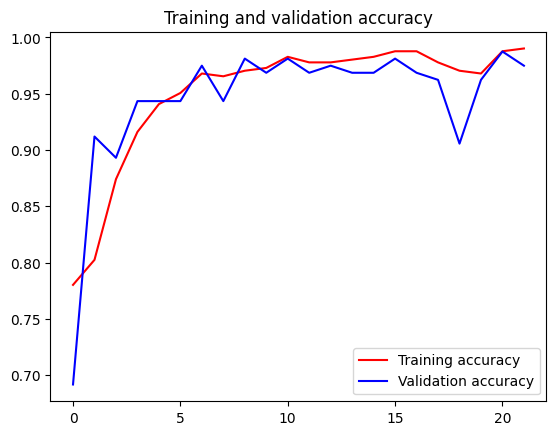

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

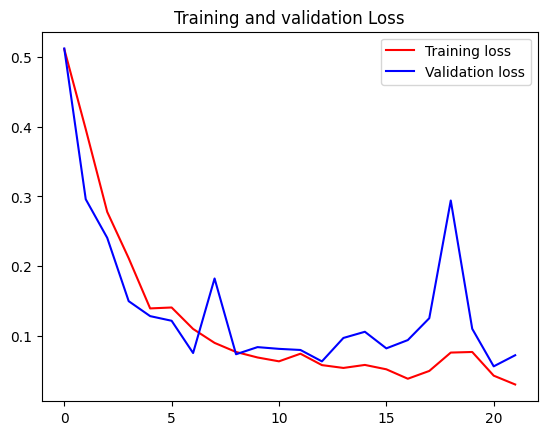

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

----

### Try Input Image

In [1]:
import numpy as np
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.utils import load_img, img_to_array

#Code for open dialog window on Local Machine
root = tk.Tk()
root.withdraw()
uploaded = filedialog.askopenfilename()
 
#Predicting images
path = 'Dataset/train/acne/acne-closed-comedo-1.png'
img = load_img(path, target_size=(150, 150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = rednessModel.predict(images, batch_size=10)
print(classes[0])
    
if classes[0]>0.5:
  print("noacne")
else:
  print("acne")
 
 

----

### Convert and Save Model

In [32]:
import pickle

dump = {
    'acne':acneModel,
}
# Save your model to a file using pickle
with open("acneModel.pkl", "wb") as f:
    pickle.dump(dump, f)

In [ ]:
acneModel.save("acneModel")

In [34]:
acneModel.save("acneModel.h5")